## Requirements

In [ ]:
import os
import kagglehub

#The save path in Google Drive
drive_path = "/content/drive/MyDrive/Yolo_Models"
os.makedirs(drive_path, exist_ok=True)

In [ ]:
!kaggle datasets download -d fatihkgg/affectnet-yolo-format -p /content/drive/MyDrive/Datasets

Dataset URL: https://www.kaggle.com/datasets/fatihkgg/affectnet-yolo-format
License(s): MIT
affectnet-yolo-format.zip: Skipping, found more recently modified local copy (use --force to force download)


## Exploratory Data Analysis

In [ ]:
# importing the general dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import warnings

warnings.filterwarnings('ignore')

In [ ]:
import os
import zipfile

# Define dataset path in Google Drive
Drive_dataset = "/content/drive/MyDrive/Datasets/affectnet-yolo-format.zip"

# Extract the dataset
dataset_root = "/content/affectnet_yolo"  # Define where to extract
with zipfile.ZipFile(Drive_dataset, 'r') as zip_ref:
    zip_ref.extractall(dataset_root)

# Check the dataset structure
for root, directories, files in os.walk(dataset_root):
    print(f"📂 Current Directory: {root}")
    print(f"📁 Subdirectories: {directories}")
    print(f"📄 Number of Files: {len(files)}")

    # Print only the first 5 files to avoid flooding the output
    for file in files[:5]:
        print(f"   ➡ File: {os.path.join(root, file)}")

    print("-" * 50)  # Separator for readability


📂 Current Directory: /content/affectnet_yolo
📁 Subdirectories: ['YOLO_format']
📄 Number of Files: 0
--------------------------------------------------
📂 Current Directory: /content/affectnet_yolo/YOLO_format
📁 Subdirectories: ['valid', 'test', 'train']
📄 Number of Files: 1
   ➡ File: /content/affectnet_yolo/YOLO_format/data.yaml
--------------------------------------------------
📂 Current Directory: /content/affectnet_yolo/YOLO_format/valid
📁 Subdirectories: ['images', 'labels']
📄 Number of Files: 0
--------------------------------------------------
📂 Current Directory: /content/affectnet_yolo/YOLO_format/valid/images
📁 Subdirectories: []
📄 Number of Files: 5406
   ➡ File: /content/affectnet_yolo/YOLO_format/valid/images/image0005380.jpg
   ➡ File: /content/affectnet_yolo/YOLO_format/valid/images/ffhq_4407.png
   ➡ File: /content/affectnet_yolo/YOLO_format/valid/images/image0033736.jpg
   ➡ File: /content/affectnet_yolo/YOLO_format/valid/images/image0040444.jpg
   ➡ File: /content/affe

In [ ]:
# Define dataset path
dataset_root = "/content/affectnet_yolo/YOLO_format"  # Now it points inside YOLO_format

# Print dataset contents
print("Dataset contents:", os.listdir(dataset_root))

Dataset contents: ['valid', 'test', 'train', 'data.yaml']


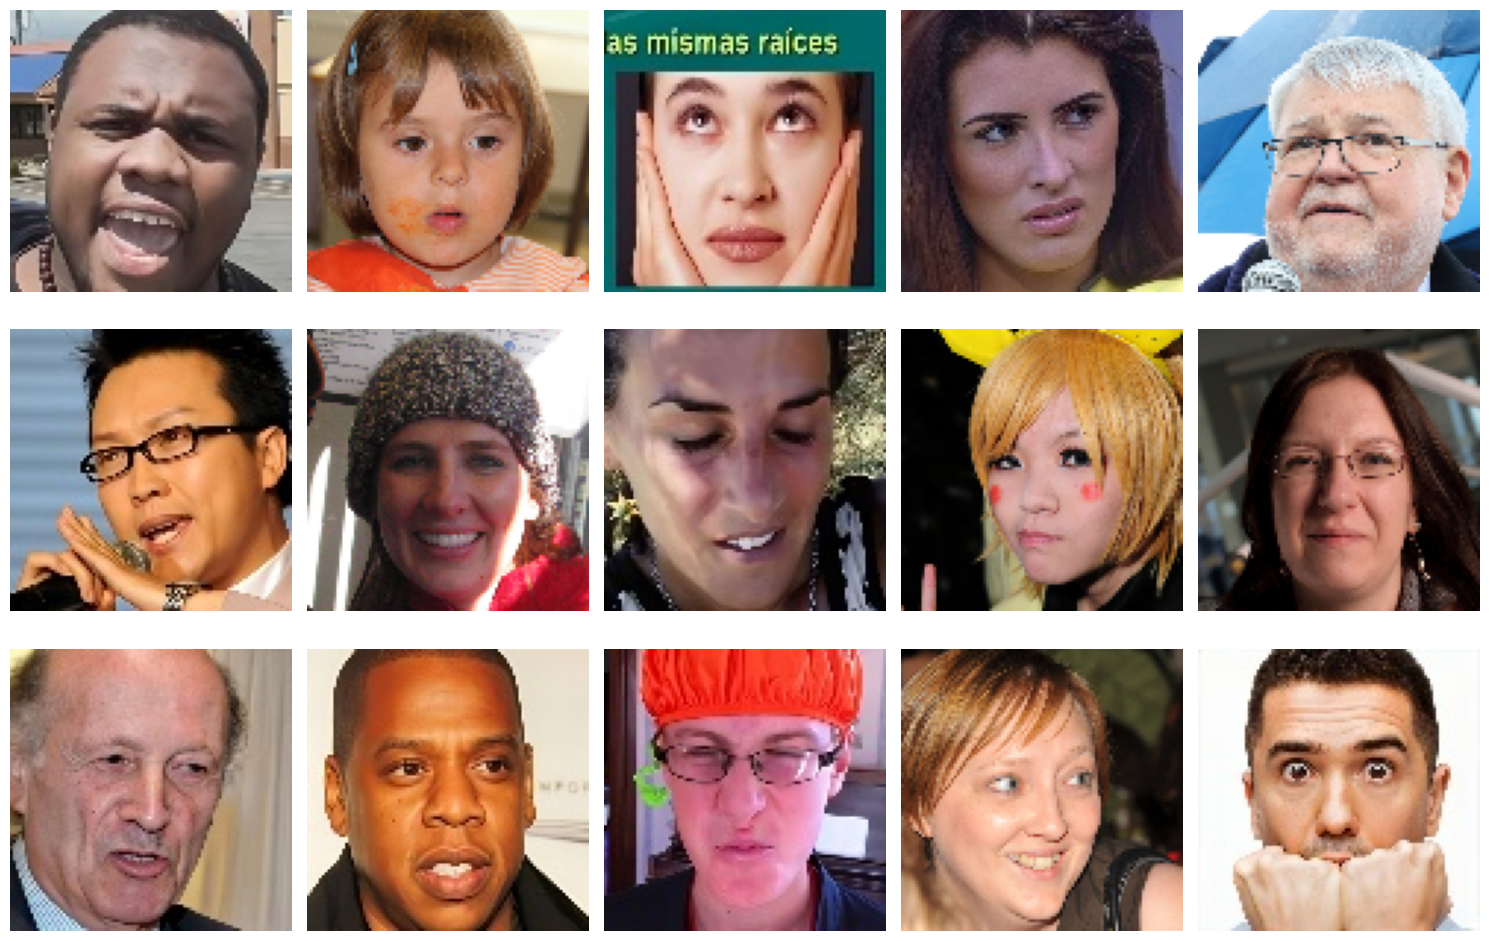

In [ ]:
# Correct folder paths
image_folders = [
    os.path.join(dataset_root, "valid/images"),
    os.path.join(dataset_root, "test/images"),
    os.path.join(dataset_root, "train/images")
]

# Define the number of images you want to display from each folder
num_images_per_folder = 5

# Create a subplot grid
fig, axes = plt.subplots(len(image_folders), num_images_per_folder, figsize=(15, 10))

# Loop through each image folder
for i, folder in enumerate(image_folders):
    if not os.path.exists(folder):
        print(f"Warning: Folder not found -> {folder}")
        continue  # Skip non-existent folders

    image_files = os.listdir(folder)[:num_images_per_folder]  # Get the list of image files
    for j, image_file in enumerate(image_files):
        image_path = os.path.join(folder, image_file)
        try:
            # Open and display the image
            img = plt.imread(image_path)
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
        except Exception as e:
            print(f"Error opening image: {image_path} - {e}")

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
# Print the number of images in each folder
for folder in image_folders:
    if os.path.exists(folder):
        num_images = len(os.listdir(folder))  # Count number of files
        print(f"{folder}: {num_images} images")
    else:
        print(f"❌ Folder not found -> {folder}")

/content/affectnet_yolo/YOLO_format/valid/images: 5406 images
/content/affectnet_yolo/YOLO_format/test/images: 2755 images
/content/affectnet_yolo/YOLO_format/train/images: 17101 images


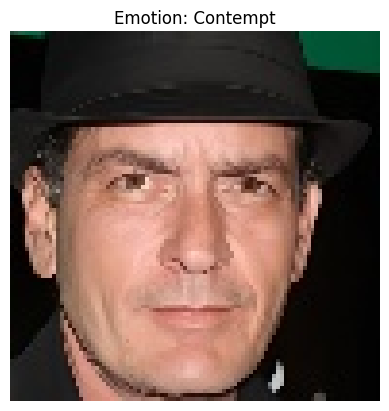

✅ Image Path: /content/affectnet_yolo/YOLO_format/train/images/image0026902.jpg
✅ Label Path: /content/affectnet_yolo/YOLO_format/train/labels/image0026902.txt


In [ ]:
import os
import random
import matplotlib.pyplot as plt

# Labels mapping
labels_map = {
    '0': 'Anger',
    '1': 'Contempt',
    '2': 'Disgust',
    '3': 'Fear',
    '4': 'Happy',
    '5': 'Neutral',
    '6': 'Sad',
    '7': 'Surprise'
}

# Define paths
train_images_path = os.path.join(dataset_root, 'train/images')
train_labels_path = os.path.join(dataset_root, 'train/labels')  # ✅ Corrected path

# Get all image filenames
image_files = os.listdir(train_images_path)
if not image_files:
    print("❌ No images found in:", train_images_path)
else:
    # Pick a random image safely
    random_image_name = random.choice(image_files)  # ✅ Pick a valid image
    random_image_path = os.path.join(train_images_path, random_image_name)

    # Read corresponding label file
    random_label_file = random_image_name.replace('.jpg', '.txt').replace('.png', '.txt')  # ✅ Handle different formats
    random_label_path = os.path.join(train_labels_path, random_label_file)

    if os.path.exists(random_label_path):
        with open(random_label_path, 'r') as file:
            first_line = file.readline().strip()  # Read first line
            if first_line:
                class_index = first_line.split()[0]  # Get first value
                image_class = labels_map.get(class_index, "Unknown")  # Handle missing keys

                # Display image
                random_image = plt.imread(random_image_path)
                plt.imshow(random_image)
                plt.title(f'Emotion: {image_class}')
                plt.axis("off")
                plt.show()

                print(f"✅ Image Path: {random_image_path}")
                print(f"✅ Label Path: {random_label_path}")
            else:
                print(f"⚠️ Empty label file: {random_label_path}")
    else:
        print(f"❌ Label file not found: {random_label_path}")


In [ ]:
from collections import defaultdict

# Define paths to the label directories
label_folders = [
    os.path.join(dataset_root,"valid/labels"),
    os.path.join(dataset_root,"test/labels"),
    os.path.join(dataset_root,"train/labels")
]

# Dictionary to store class frequencies
class_frequencies = defaultdict(int)

# Iterate over each label directory (valid, test, train)
for label_dir in label_folders:

    # Iterate over each .txt file in the labels directory
    for file_name in os.listdir(label_dir):
        if file_name.endswith('.txt'):
            file_path = os.path.join(label_dir, file_name)

            # Read the first line of the file
            with open(file_path, 'r') as file:
                for line in file:
                    class_index = line.split()[0]  # The first value is the class label

                    # Increment the frequency for the class
                    class_frequencies[class_index] += 1

# Convert to numpy array for further processing
class_frequencies_array = np.array(list(class_frequencies.values()))

# Display the class frequencies
print("Class Frequencies:", class_frequencies)


Class Frequencies: defaultdict(<class 'int'>, {'7': 4161, '4': 3344, '3': 2961, '1': 2946, '5': 2380, '2': 3241, '0': 3434, '6': 2795})


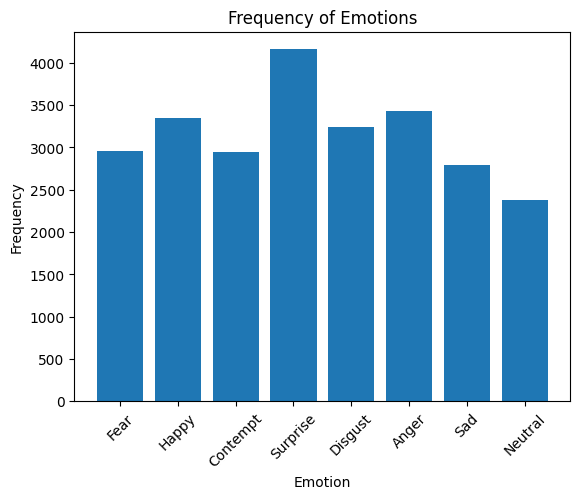

In [ ]:
# Get class labels (keys) and their counts (values)
labels = list(class_frequencies.keys())
counts = list(class_frequencies.values())

# Map the class labels to their corresponding names
unique_mapped = [labels_map[x] for x in labels]

# Create the bar plot
plt.bar(unique_mapped, counts)

# Add labels and title
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.title('Frequency of Emotions')
plt.xticks(rotation=45)

# Show the plot
plt.show()


# YOLO Face Expression Detector

## Setup

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 923.8/923.8 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 115.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image
from IPython import display
display.clear_output()

!yolo checks

Ultralytics 8.3.87 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.7/112.6 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.11.11
Install             pip
Path                /usr/local/lib/python3.11/dist-packages/ultralytics
RAM                 12.67 GB
Disk                39.7/112.6 GB
CPU                 Intel Xeon 2.20GHz
CPU count           2
GPU                 Tesla T4, 15095MiB
GPU count           1
CUDA                12.4

numpy               ✅ 1.26.4<=2.1.1,>=1.23.0
matplotlib          ✅ 3.10.0>=3.3.0
opencv-python       ✅ 4.11.0.86>=4.6.0
pillow              ✅ 11.1.0>=7.1.2
pyyaml              ✅ 6.0.2>=5.3.1
requests            ✅ 2.32.3>=2.23.0
scipy               ✅ 1.13.1>=1.4.1
torch               ✅ 2.5.1+cu124>=1.8.0
torch               ✅ 2.5.1+cu124!=2.4.0,>=1.8.0; sys_platform == "win32"
torchvision         ✅ 0.20.1+cu124>=0.9.0
tqdm                

## Train the model with custom dataset

In [ ]:
os.environ["WANDB_MODE"] = "disabled"

In [ ]:
os.listdir(dataset_root)

['train', 'valid', 'data.yaml', 'test']

In [ ]:
import yaml

# Path to the data.yaml file
data_yaml_path = os.path.join(dataset_root, 'data.yaml')

# Read the original data.yaml file
with open(data_yaml_path, 'r') as file:
    data_yaml = yaml.safe_load(file)

# Update paths dynamically based on the dataset's actual location in Colab
data_yaml['train'] = os.path.join(dataset_root, 'train/images')
data_yaml['val'] = os.path.join(dataset_root, 'valid/images')
data_yaml['test'] = os.path.join(dataset_root, 'test/images')

# Save the updated data.yaml file (this will create a temporary new file in /tmp)
updated_data_yaml_path = '/tmp/updated_data.yaml'
with open(updated_data_yaml_path, 'w') as file:
    yaml.dump(data_yaml, file)


In [ ]:
!yolo task=detect \
mode=train \
model=yolov8l.pt \
data={updated_data_yaml_path} \
epochs=50 \
imgsz=640 \
project="/content/drive/MyDrive/Yolo_Models2" \
name="yolo_training2"

## Mounting the Drive

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Path to your YOLO training directory
yolo_training_path = '/content/drive/MyDrive/Yolo_Models2/yolo_training2'

# List files in the directory
files = os.listdir(yolo_training_path)
print(files)

['weights', 'args.yaml', 'labels_correlogram.jpg', 'labels.jpg', 'train_batch0.jpg', 'train_batch1.jpg', 'train_batch2.jpg', 'results.csv', 'events.out.tfevents.1741457331.2f751ed04165.2166.0']


In [ ]:
import pandas as pd

# Path to results.csv
csv_path = "/content/drive/MyDrive/Yolo_Models2/yolo_training2/results.csv"

# Load CSV
df = pd.read_csv(csv_path)

# Show the last row (final metrics)
print(df.tail(1))


    epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
25     26  10434.5         0.05597         1.10763         0.88811   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
25               0.69219            0.76024           0.79698   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
25              0.79696       0.12569       0.75454       0.29111  0.007525   

      lr/pg1    lr/pg2  
25  0.007525  0.007525  


In [ ]:
print(df.columns)

Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


In [ ]:
# Get last row
last_row = df.iloc[-1]

# Print key metrics
print(f"Final mAP@50: {last_row['metrics/mAP50-95(B)']:.4f}")
print(f"Final mAP@50-95: {last_row['metrics/mAP50(B)']:.4f}")
print(f"Final Precision: {last_row['metrics/precision(B)']:.4f}")
print(f"Final Recall: {last_row['metrics/recall(B)']:.4f}")


Final mAP@50: 0.7970
Final mAP@50-95: 0.7970
Final Precision: 0.6922
Final Recall: 0.7602


## Load the Model

In [ ]:
# First install the ultralytics package
#!pip install ultralytics

# Then load YOLOv8 properly
from ultralytics import YOLO

# Load your custom-trained model
model = YOLO("/content/drive/MyDrive/Yolo_Models/yolo_training2/weights/best.pt")

# Verify model loading
print("Model loaded successfully:")
print(model)

Model loaded successfully:
YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, a

## Test

In [ ]:
# Path to the test dataset
test_data =  os.path.join(dataset_root, "test/images")

# Run YOLOv8 inference on test images
!yolo task=detect mode=predict \
model=/content/drive/MyDrive/Yolo_Models/yolo_training2/weights/best.pt \
source={test_data} \
imgsz=640


Ultralytics 8.3.87 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,128,680 parameters, 0 gradients, 28.5 GFLOPs

image 1/2755 /content/affectnet_yolo/YOLO_format/test/images/ffhq_1002.png: 640x640 1 Surprise, 16.2ms
image 2/2755 /content/affectnet_yolo/YOLO_format/test/images/ffhq_1014.png: 640x640 1 Happy, 16.3ms
image 3/2755 /content/affectnet_yolo/YOLO_format/test/images/ffhq_102.png: 640x640 1 Happy, 16.2ms
image 4/2755 /content/affectnet_yolo/YOLO_format/test/images/ffhq_103.png: 640x640 2 Happys, 16.2ms
image 5/2755 /content/affectnet_yolo/YOLO_format/test/images/ffhq_1033.png: 640x640 1 Happy, 16.2ms
image 6/2755 /content/affectnet_yolo/YOLO_format/test/images/ffhq_1034.png: 640x640 1 Surprise, 16.2ms
image 7/2755 /content/affectnet_yolo/YOLO_format/test/images/ffhq_1037.png: 640x640 1 Happy, 16.2ms
image 8/2755 /content/affectnet_yolo/YOLO_format/test/images/ffhq_1043.png: 640x640 1 Happy, 16.2ms
image 9/2755 /content/affectne

## Save Predictions in Google Drive

In [ ]:
import shutil

# Path where YOLO saves predictions
predictions_path = "/content/runs/detect/predict"

# Define Drive path
drive_save_path = "/content/drive/MyDrive/YoloTestResults"

# Move predictions to Google Drive
shutil.move(predictions_path, drive_save_path)

print(f"Results saved to: {drive_save_path}")


Results saved to: /content/drive/MyDrive/YoloTestResults


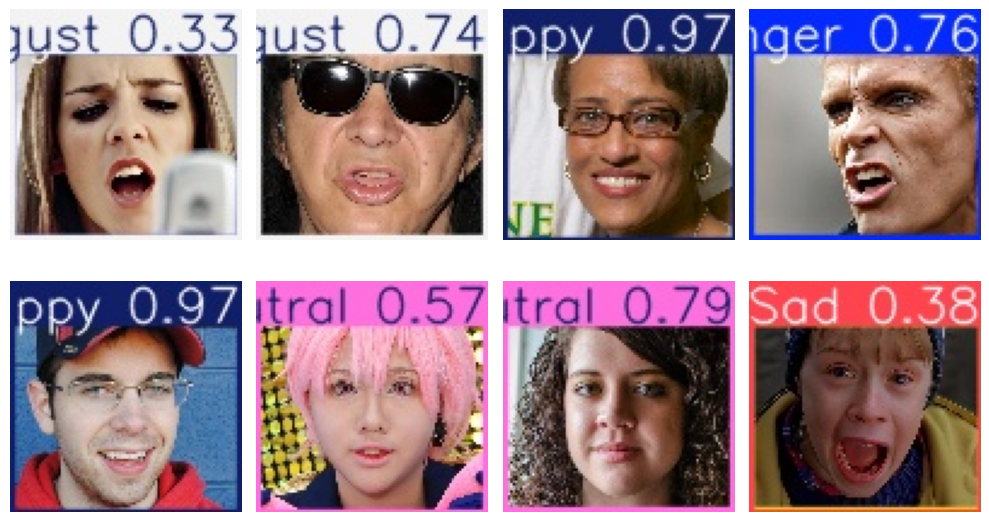

In [ ]:
import random
import glob
import matplotlib.pyplot as plt
import PIL.Image

# Get all predicted images
predictions_path = "/content/drive/MyDrive/YoloTestResults/*.jpg"
predicted_images = glob.glob(predictions_path)

# Select 8 random images
random_images = random.sample(predicted_images, min(8, len(predicted_images)))

# Show images in a grid
fig, axes = plt.subplots(2, 4, figsize=(10, 6))  # 2 rows, 4 columns

for ax, img_path in zip(axes.flatten(), random_images):
    img = PIL.Image.open(img_path)
    ax.imshow(img)
    ax.axis("off")  # Hide axes

plt.tight_layout()
plt.show()

## Evaluate the Model

In [ ]:
!yolo task=detect \
mode=val \
model=/content/drive/MyDrive/Yolo_Models2/yolo_training2/weights/best.pt \
data={os.path.join(dataset_root,'data.yaml')} \
imgsz=640 \
save = True

Ultralytics 8.3.86 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 11,128,680 parameters, 0 gradients, 28.5 GFLOPs
100% 755k/755k [00:00<00:00, 11.5MB/s]
val: Scanning /content/affectnet_yolo/YOLO_format/valid/labels... 5406 images, 0 backgrounds, 0 corrupt: 100% 5406/5406 [00:05<00:00, 989.21it/s] 
val: New cache created: /content/affectnet_yolo/YOLO_format/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 338/338 [1:14:53<00:00, 13.29s/it]
                   all       5406       5406      0.691      0.761      0.797      0.797
                 Anger        712        712      0.677      0.778      0.792      0.792
              Contempt        618        618      0.705      0.785      0.815      0.815
               Disgust        672        672      0.644      0.725      0.764      0.764
                  Fear        622        622      0.692      0.757      0.814      0.814

In [ ]:
# prompt: save this /content/runs/detect/val in /content/drive/MyDrive/Yolo_Models2/yolo_training2

import shutil

# Source and destination paths
source_path = "/content/runs/detect/val"
destination_path = "/content/drive/MyDrive/Yolo_Models2/yolo_training2"

# Create the destination directory if it doesn't exist
import os
os.makedirs(destination_path, exist_ok=True)

# Move the directory
shutil.move(source_path, destination_path)


'/content/drive/MyDrive/Yolo_Models2/yolo_training2/val'

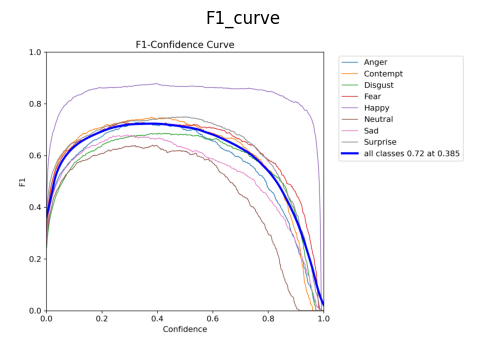

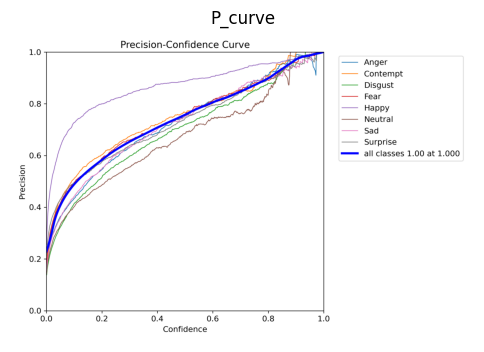

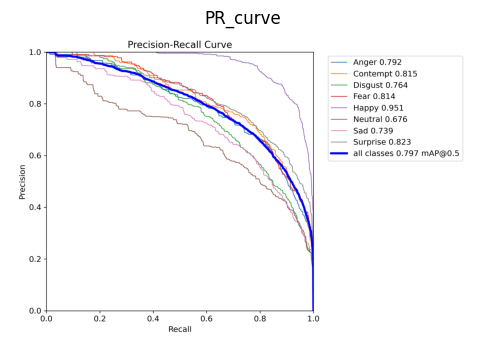

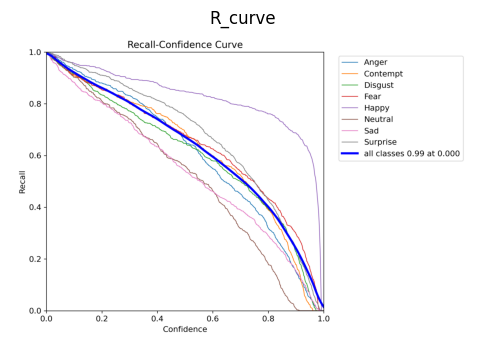

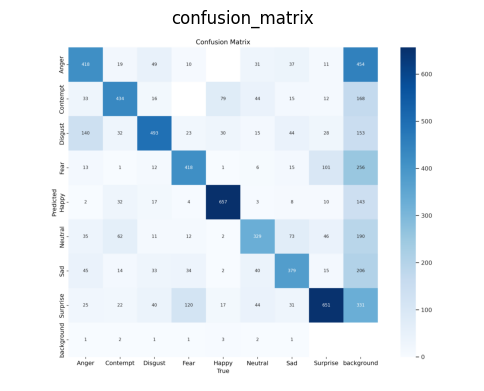

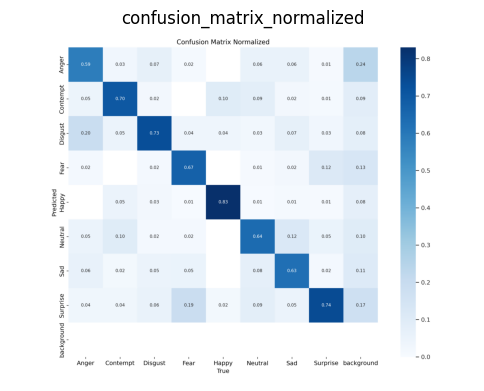

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Path to your validation results
validation_dir = "/content/drive/MyDrive/Yolo_Models2/yolo_training2/val"

# List of evaluation metric images
metric_images = [
    "F1_curve.png",
    "P_curve.png",
    "PR_curve.png",
    "R_curve.png",
    "confusion_matrix.png",
    "confusion_matrix_normalized.png"
]

# Plot each image
for img_name in metric_images:
    img_path = os.path.join(validation_dir, img_name)
    if os.path.exists(img_path):
        img = mpimg.imread(img_path)
        plt.figure(figsize=(6, 6))
        plt.imshow(img)
        plt.axis("off")
        plt.title(img_name.replace(".png", ""))
        plt.show()
    else:
        print(f"❌ {img_name} not found.")


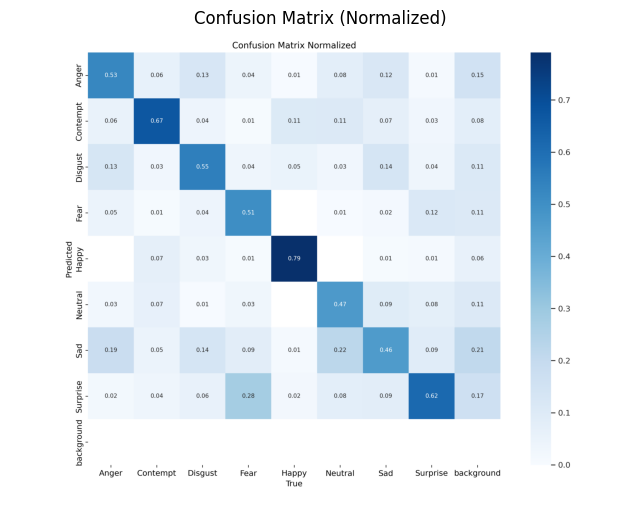

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load confusion matrix image
conf_matrix_path = "/content/drive/MyDrive/Yolo_Models/validation_results/val/confusion_matrix_normalized.png"
img = plt.imread(conf_matrix_path)

plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis("off")
plt.title("Confusion Matrix (Normalized)")
plt.show()


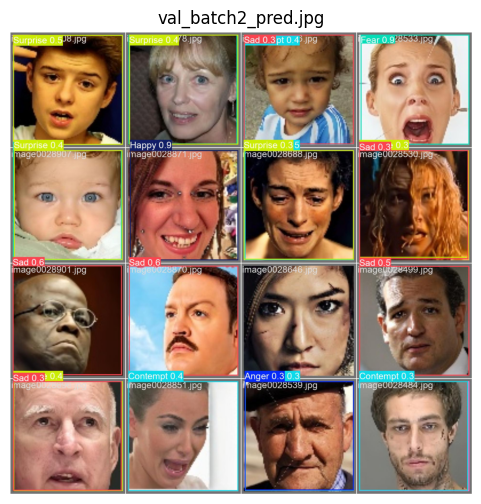

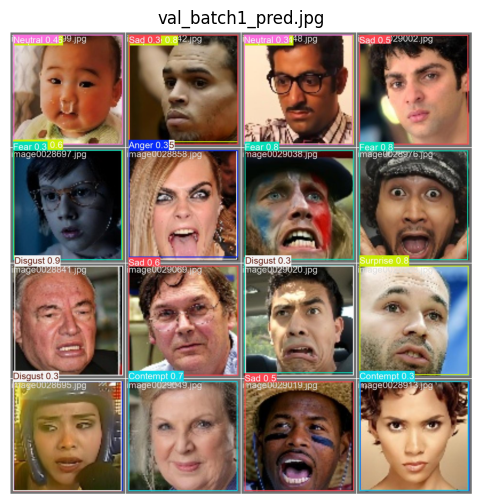

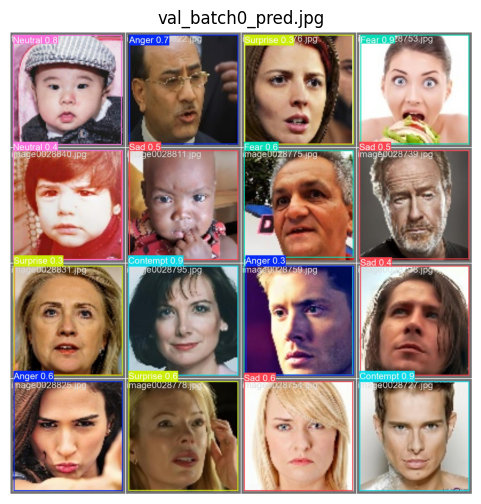

In [ ]:
import random
import glob

# Get all predicted images
pred_images = glob.glob(os.path.join(validation_dir, "val_batch*_pred.jpg"))

# Select 8 random images
random_preds = random.sample(pred_images, min(8, len(pred_images)))

# Display them
for img_path in random_preds:
    img = mpimg.imread(img_path)
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.title(os.path.basename(img_path))
    plt.show()


## Final Inference on a video

In [ ]:
from IPython.display import Video

In [ ]:
# Embed and display the sample video within the notebook
Video("/content/drive/MyDrive/Job Interview_ I Want to Learn (ESL).mp4", embed=True, width=960)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!pip install ultralytics

# Load YOLOv8 properly
from ultralytics import YOLO

# Load your custom-trained model
model = YOLO('/content/drive/MyDrive/Yolo_Models/yolo_training2/weights/best.pt')  # Make sure this file exists

In [ ]:
# Define the destination path in the working directory
video_path = '/content/drive/MyDrive/Job Interview_ I Want to Learn (ESL).mp4'

#Predict
model.predict(source=video_path, save=True)

Output hidden; open in https://colab.research.google.com to view.

In [54]:
# Convert the .avi video generated by the YOLOv8 prediction to .mp4 format for compatibility with notebook display
!ffmpeg -y -loglevel panic -i "/content/runs/detect/predict2/Job Interview_ I Want to Learn (ESL).avi" '/content/drive/MyDrive/processed_sample_video2.mp4'

In [55]:
# Embed and display the sample video within the notebook
Video("/content/drive/MyDrive/processed_sample_video2.mp4", embed=True, width=960)

Output hidden; open in https://colab.research.google.com to view.